In [1]:
import pathlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# SET `classification_profiles_save_dir` BELOW
# We used an external harddrive and therefore needed to use specific paths
classification_profiles_save_dir = pathlib.Path(
    "/media/roshankern/63af2010-c376-459e-a56e-576b170133b6/data/cell-health-plate-classification-profiles"
)

MCM_classification_profiles_save_dir = pathlib.Path(
    f"{classification_profiles_save_dir}/multi_class_models/"
)
SCM_classification_profiles_save_dir = pathlib.Path(
    f"{classification_profiles_save_dir}/single_class_models/"
)


Showing final/shuffled_baseline proabibilty differences heatmap for CP features...


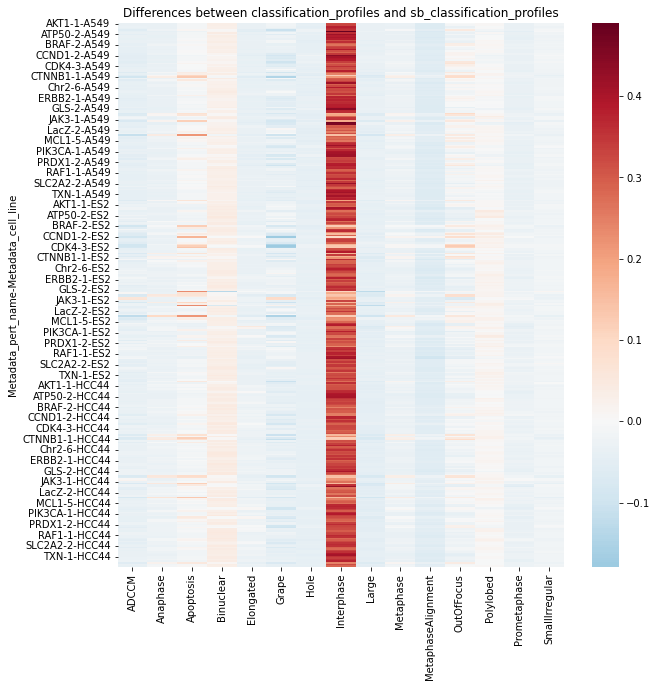

Showing final/shuffled_baseline proabibilty differences heatmap for DP features...


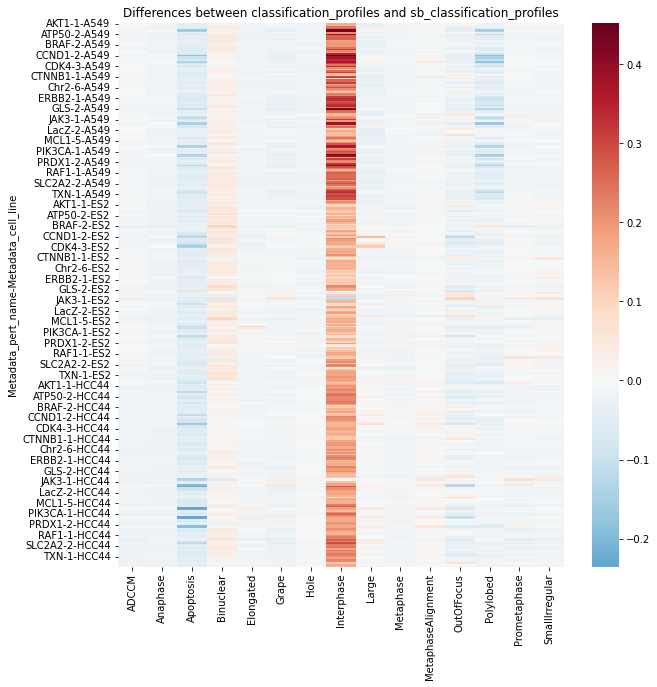

Showing final/shuffled_baseline proabibilty differences heatmap for CP_and_DP features...


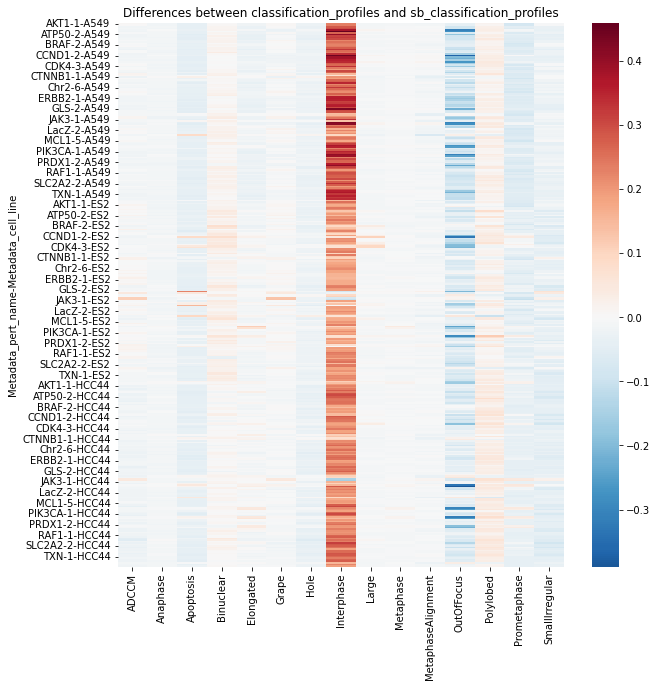

In [3]:
feature_types = ["CP", "DP", "CP_and_DP"]

for feature_type in feature_types:
    print(f"Showing final/shuffled_baseline proabibilty differences heatmap for {feature_type} features...")
    
    final_classification_profiles_path = pathlib.Path(f"{MCM_classification_profiles_save_dir}/final__{feature_type}__classification_profiles.tsv")
    final_classification_profiles = pd.read_csv(final_classification_profiles_path, sep="\t")
    
    sb_classification_profiles_path = pathlib.Path(f"{MCM_classification_profiles_save_dir}/shuffled_baseline__{feature_type}__classification_profiles.tsv")
    sb_classification_profiles = pd.read_csv(sb_classification_profiles_path, sep="\t")
    
    difference_df = final_classification_profiles.set_index(['Metadata_pert_name', 'Metadata_cell_line']) - sb_classification_profiles.set_index(['Metadata_pert_name', 'Metadata_cell_line'])
    
    plt.figure(figsize=(10, 10))  # You can adjust the size of the plot to your needs
    sns.heatmap(difference_df, cmap='RdBu_r', center=0)  # 'RdBu_r' is a diverging color map, which is useful for visualizing differences
    plt.title('Differences between classification_profiles and sb_classification_profiles')
    plt.show()